In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-yield/Sweetness.ipynb
/kaggle/input/fruit-yield/QualityDetection.ipynb
/kaggle/input/fruit-yield/Quantity.ipynb
/kaggle/input/fruit-yield/FruitYield DataSet/Orange/orange_398.jpg
/kaggle/input/fruit-yield/FruitYield DataSet/Orange/orange_20.jpg
/kaggle/input/fruit-yield/FruitYield DataSet/Orange/orange_520.jpg
/kaggle/input/fruit-yield/FruitYield DataSet/Orange/orange_504.jpg
/kaggle/input/fruit-yield/FruitYield DataSet/Orange/orange_337.jpg
/kaggle/input/fruit-yield/FruitYield DataSet/Orange/orange_190.jpg
/kaggle/input/fruit-yield/FruitYield DataSet/Orange/orange_456.jpg
/kaggle/input/fruit-yield/FruitYield DataSet/Orange/orange_242.jpg
/kaggle/input/fruit-yield/FruitYield DataSet/Orange/orange_351.jpg
/kaggle/input/fruit-yield/FruitYield DataSet/Orange/orange_507.jpg
/kaggle/input/fruit-yield/FruitYield DataSet/Orange/orange_479.jpg
/kaggle/input/fruit-yield/FruitYield DataSet/Orange/orange_28.jpg
/kaggle/input/fruit-yield/FruitYield DataSet/Orange/orange_331.jpg

In [2]:
import os
import cv2
import random
import shutil
from collections import defaultdict
from tqdm import tqdm

# Your dataset paths
image_dir = '/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/train/images'
label_dir = '/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/train/labels'
aug_image_dir = '/kaggle/working/augmented_dataset/images'
aug_label_dir = '/kaggle/working/augmented_dataset/labels'

# Create output dirs
os.makedirs(aug_image_dir, exist_ok=True)
os.makedirs(aug_label_dir, exist_ok=True)

# Count how many images contain each class
image_class_map = defaultdict(set)

for label_file in os.listdir(label_dir):
    if label_file.endswith(".txt"):
        with open(os.path.join(label_dir, label_file), 'r') as file:
            lines = file.readlines()
            for line in lines:
                class_id = int(line.strip().split()[0])
                image_name = label_file.replace(".txt", ".jpg")
                image_class_map[class_id].add(image_name)

image_count_per_class = {cls: len(images) for cls, images in image_class_map.items()}
target_count = max(image_count_per_class.values())

print("🔢 Original class counts (by image presence):")
for k, v in image_count_per_class.items():
    print(f"Class {k}: {v}")
print(f"🎯 Target count per class: {target_count}\n")

# Augment
augmentation_id = 0
for class_id, images in image_class_map.items():
    needed = target_count - len(images)
    if needed <= 0:
        continue

    print(f"Augmenting class {class_id} with {needed} images...")
    images = list(images)
    for _ in tqdm(range(needed)):
        original_image = random.choice(images)
        img_path = os.path.join(image_dir, original_image)
        label_path = os.path.join(label_dir, original_image.replace(".jpg", ".txt"))

        # Load image and label
        img = cv2.imread(img_path)
        with open(label_path, 'r') as f:
            label_data = f.read()

        # Choose augmentation
        if random.random() < 0.5:
            img = cv2.flip(img, 1)  # Horizontal flip
        else:
            value = random.uniform(0.5, 1.5)
            img = cv2.convertScaleAbs(img, alpha=value, beta=0)

        aug_img_name = f"aug_{augmentation_id}.jpg"
        aug_lbl_name = f"aug_{augmentation_id}.txt"

        cv2.imwrite(os.path.join(aug_image_dir, aug_img_name), img)
        with open(os.path.join(aug_label_dir, aug_lbl_name), 'w') as f:
            f.write(label_data)

        augmentation_id += 1

# Optionally copy original data too
for f in os.listdir(image_dir):
    shutil.copy(os.path.join(image_dir, f), os.path.join(aug_image_dir, f))
for f in os.listdir(label_dir):
    shutil.copy(os.path.join(label_dir, f), os.path.join(aug_label_dir, f))

print("✅ Augmentation complete and combined with original dataset.")

🔢 Original class counts (by image presence):
Class 7: 281
Class 5: 275
Class 4: 273
Class 2: 282
Class 6: 279
Class 1: 243
Class 3: 295
Class 0: 266
🎯 Target count per class: 295

Augmenting class 7 with 14 images...


100%|██████████| 14/14 [00:00<00:00, 59.91it/s]


Augmenting class 5 with 20 images...


100%|██████████| 20/20 [00:00<00:00, 76.36it/s]


Augmenting class 4 with 22 images...


100%|██████████| 22/22 [00:00<00:00, 89.89it/s]


Augmenting class 2 with 13 images...


100%|██████████| 13/13 [00:00<00:00, 75.81it/s]


Augmenting class 6 with 16 images...


100%|██████████| 16/16 [00:00<00:00, 93.78it/s]


Augmenting class 1 with 52 images...


100%|██████████| 52/52 [00:00<00:00, 100.45it/s]


Augmenting class 0 with 29 images...


100%|██████████| 29/29 [00:00<00:00, 95.55it/s]


✅ Augmentation complete and combined with original dataset.


In [3]:
import os

# Path to your final image directory (includes both original + augmented images)
augmented_image_dir = '/kaggle/working/augmented_dataset/images'

# Get list of image files
image_files = [f for f in os.listdir(augmented_image_dir) if f.endswith('.jpg')]

# Count
total_images = len(image_files)

print(f"🖼️ Total number of images in augmented dataset: {total_images}")


🖼️ Total number of images in augmented dataset: 2358


In [4]:
import os

# Path to your final image directory (includes both original + augmented images)
augmented_image_dir = '/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/train/images'

# Get list of image files
image_files = [f for f in os.listdir(augmented_image_dir) if f.endswith('.jpg')]

# Count
total_images = len(image_files)

print(f"🖼️ Total number of images in augmented dataset: {total_images}")


🖼️ Total number of images in augmented dataset: 2192


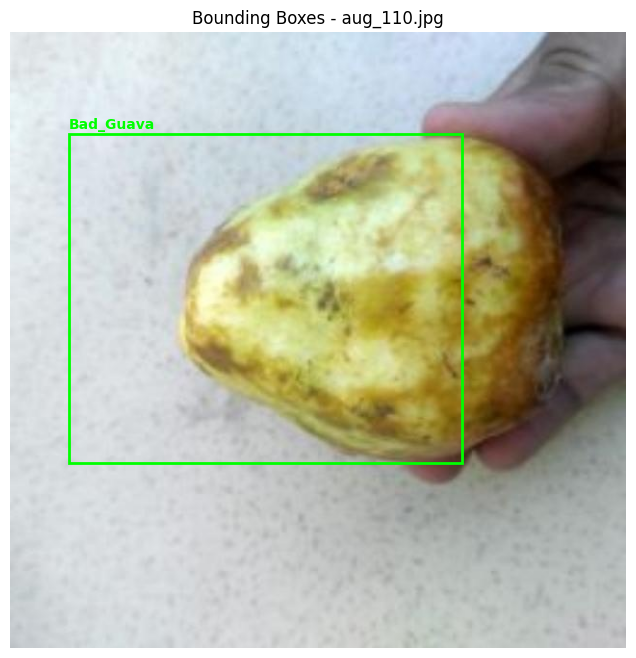

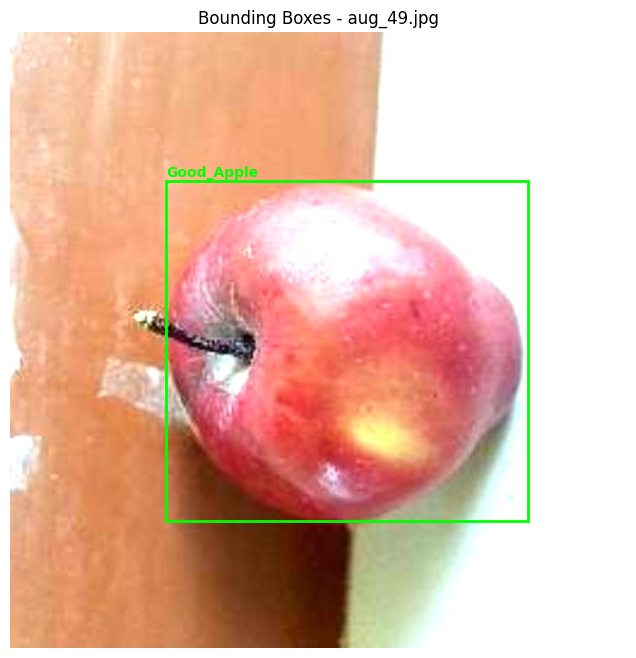

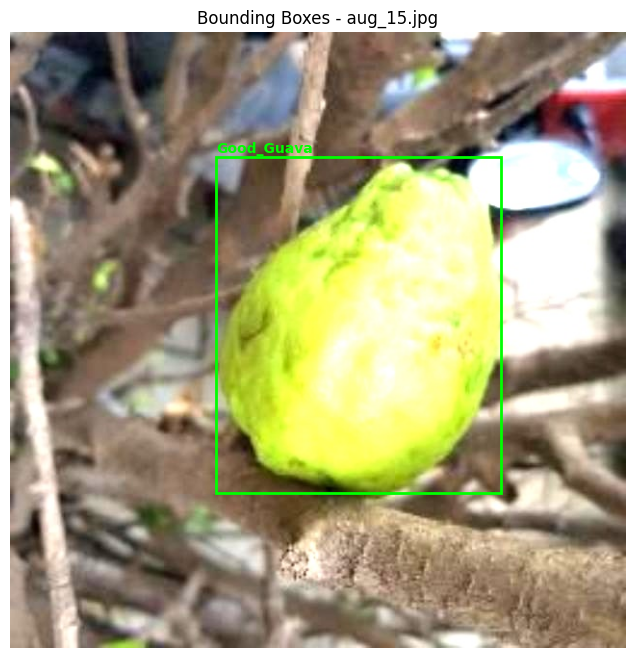

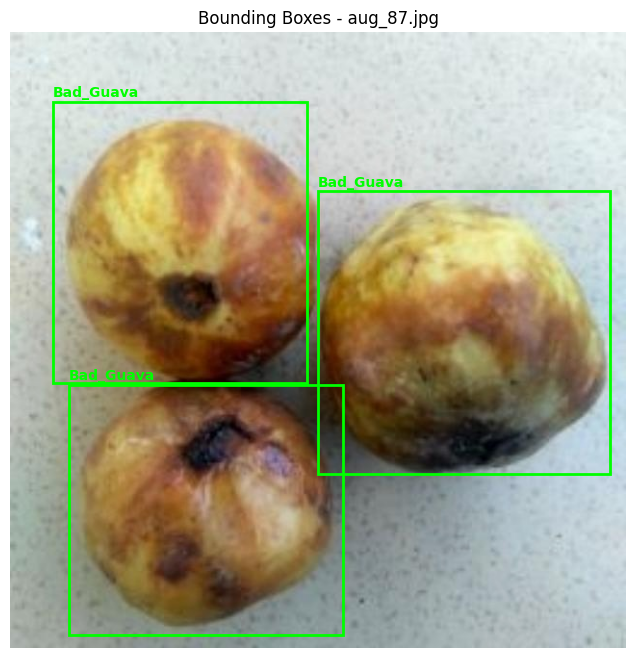

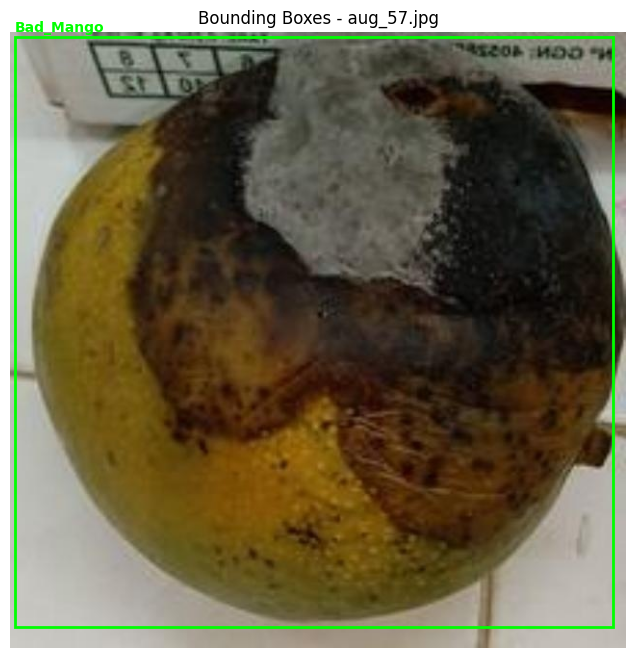

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# Paths to your augmented data
aug_image_dir = '/kaggle/working/augmented_dataset/images'
aug_label_dir = '/kaggle/working/augmented_dataset/labels'

# Your class names (index must match class ID)
class_names = [
    'Bad_Apple',
    'Bad_Guava',
    'Bad_Mango',
    'Bad_Orange',
    'Good_Apple',
    'Good_Guava',
    'Good_Mango',
    'Good_Orange'
]

# Get a list of augmented images only
aug_images = [f for f in os.listdir(aug_image_dir) if f.startswith('aug_') and f.endswith('.jpg')]

# How many to visualize
num_images_to_plot = 5

for image_file in aug_images[:num_images_to_plot]:
    image_path = os.path.join(aug_image_dir, image_file)
    label_path = os.path.join(aug_label_dir, image_file.replace('.jpg', '.txt'))

    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    # Plot image
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(image)

    # Read and draw bounding boxes
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()

        for line in lines:
            class_id, x_center, y_center, box_width, box_height = map(float, line.strip().split())

            # Convert from YOLO to pixel coordinates
            x_center *= w
            y_center *= h
            box_width *= w
            box_height *= h

            x_min = x_center - box_width / 2
            y_min = y_center - box_height / 2

            # Draw box
            rect = patches.Rectangle((x_min, y_min), box_width, box_height,
                                     linewidth=2, edgecolor='lime', facecolor='none')
            ax.add_patch(rect)

            # Draw label (class name)
            class_name = class_names[int(class_id)]
            ax.text(x_min, y_min - 5, class_name, color='lime', fontsize=10, weight='bold')
    
    ax.set_title(f"Bounding Boxes - {image_file}")
    ax.axis('off')
    plt.show()


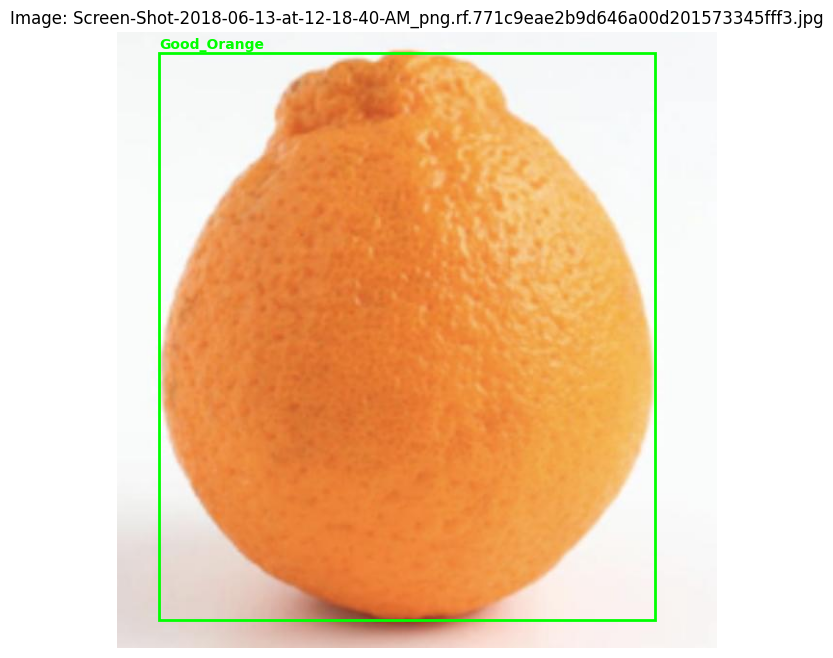

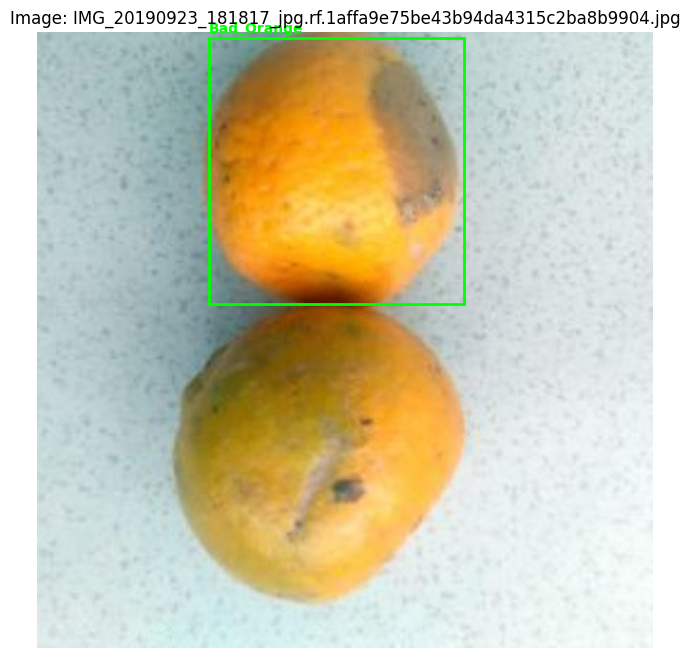

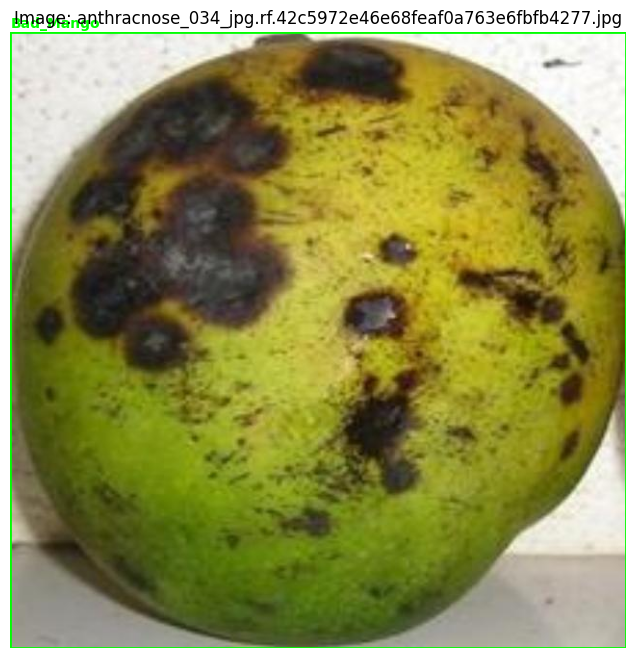

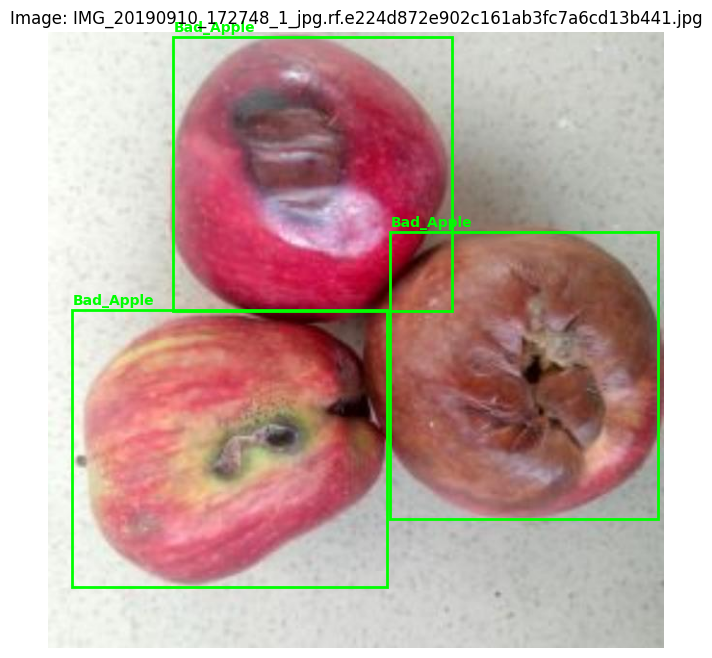

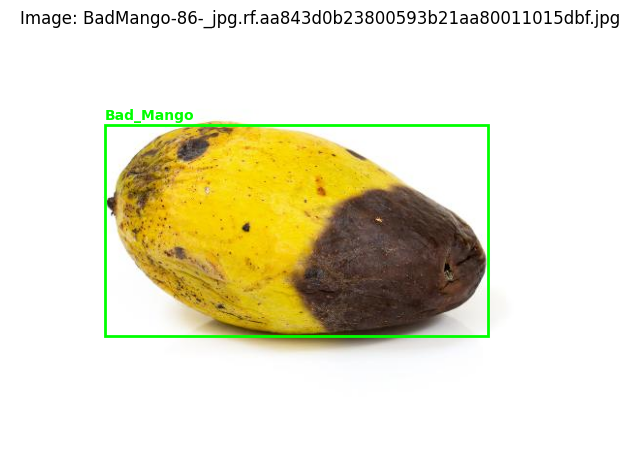

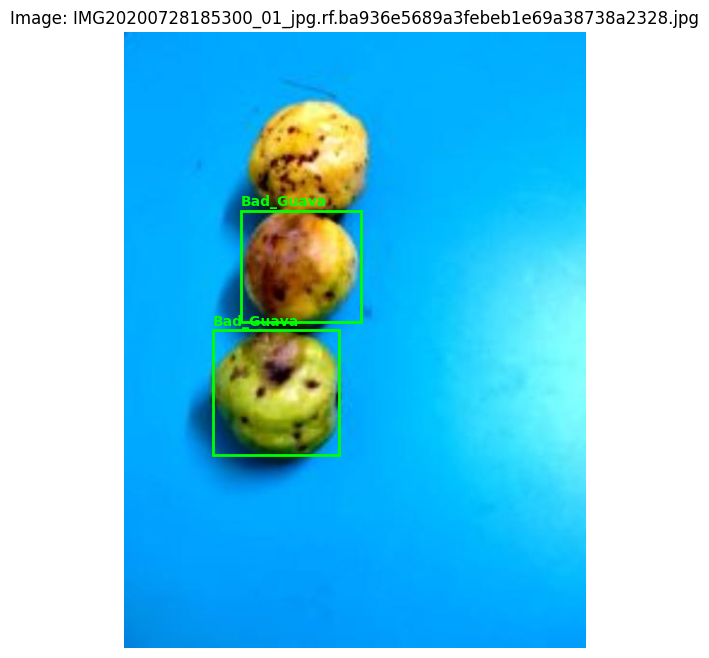

In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# Paths to images and labels
image_dir = "/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/train/images"
label_dir = "/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/train/labels"

# Your class names
class_names = [
    'Bad_Apple',
    'Bad_Guava',
    'Bad_Mango',
    'Bad_Orange',
    'Good_Apple',
    'Good_Guava',
    'Good_Mango',
    'Good_Orange'
]

# Get list of image files (filter for .jpg or .png)
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))][:6]

# Loop over the first 6 images
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    label_file = image_file.rsplit('.', 1)[0] + ".txt"
    label_path = os.path.join(label_dir, label_file)

    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    # Plot image
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(image)

    # Read label file and draw bounding boxes
    if os.path.exists(label_path):
        with open(label_path, "r") as file:
            for line in file.readlines():
                parts = line.strip().split()
                class_id, x_center, y_center, box_width, box_height = map(float, parts)

                # Convert to absolute coordinates
                x_center *= w
                y_center *= h
                box_width *= w
                box_height *= h
                x_min = x_center - box_width / 2
                y_min = y_center - box_height / 2

                # Draw bounding box
                rect = patches.Rectangle((x_min, y_min), box_width, box_height,
                                         linewidth=2, edgecolor='lime', facecolor='none')
                ax.add_patch(rect)

                # Draw label using class name
                class_name = class_names[int(class_id)]
                ax.text(x_min, y_min - 5, class_name, color='lime', fontsize=10, weight='bold')

    ax.set_title(f"Image: {image_file}")
    ax.axis('off')
    plt.show()
